
# OSMI Survey Dataset

## 01 Basic Overview of the Dataset

In [2]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import pie
import seaborn as sns
import plotly.express as px

In [33]:
# Loading the dataset and overview
#datasets/2014_survey.csv
df = pd.read_csv("final.csv")
df.head()

,Unnamed: 0,Timestamp,Unnamed: 0.1,Are you self-employed?,How many employees does your company or organization have?,Is your employer primarily a tech company/organization?,Is your primary role within your company related to tech/IT?,Does your employer provide mental health benefits as part of healthcare coverage?,Do you know the options for mental health care available under your employer-provided health coverage?,"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",Does your employer offer resources to learn more about mental health disorders and options for seeking help?,Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?,"If a mental health issue prompted you to request a medical leave from work, how easy or difficult would it be to ask for that leave?",Would you feel more comfortable talking to your coworkers about your physical health or your mental health?,Would you feel comfortable discussing a mental health issue with your direct supervisor(s)?,Have you ever discussed your mental health with your employer?,Would you feel comfortable discussing a mental health issue with your coworkers?,Have you ever discussed your mental health with coworkers?,Have you ever had a coworker discuss their or another coworker's mental health with you?,"Overall, how much importance does your employer place on physical health?","Overall, how much importance does your employer place on mental health?",Do you have medical coverage (private insurance or state-provided) that includes treatment of mental health disorders?,Do you know local or online resources to seek help for a mental health issue?,"If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to clients or business contacts?","If you have revealed a mental health disorder to a client or business contact, how has this affected you or the relationship?","If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to coworkers or employees?","If you have revealed a mental health disorder to a coworker or employee, how has this impacted you or the relationship?",Do you believe your productivity is ever affected by a mental health issue?,"If yes, what percentage of your work time (time performing primary or secondary job functions) is affected by a mental health issue?",Do you have previous employers?,Was your employer primarily a tech company/organization?,Have your previous employers provided mental health benefits?,Were you aware of the options for mental health care provided by your previous employers?,Did your previous employers ever formally discuss mental health (as part of a wellness campaign or other official communication)?,Did your previous employers provide resources to learn more about mental health disorders and how to seek help?,Was your anonymity protected if you chose to take advantage of mental health or substance abuse treatment resources with previous employers?,Would you have felt more comfortable talking to your previous employer about your physical health or your mental health?,Would you have been willing to discuss your mental health with your direct supervisor(s)?,Did you ever discuss your mental health with your previous employer?,Would you have been willing to discuss your mental health with your coworkers at previous employers?,Did you ever discuss your mental health with a previous coworker(s)?,Did you ever have a previous coworker discuss their or another coworker's mental health with you?,"Overall, how much importance did your previous employer place on physical health?","Overall, how much importance did your previous employer place on mental health?",Do you currently have a mental health disorder?,Have you ever been diagnosed with a mental health disorder?,Have you had a mental health disorder in the past?,Have you eve

In [4]:
# Attribute names
df.columns

Index(['Unnamed: 0', 'Timestamp', 'Unnamed: 0.1', 'Are you self-employed?',
       'How many employees does your company or organization have?',
       'Is your employer primarily a tech company/organization?',
       'Is your primary role within your company related to tech/IT?',
       'Does your employer provide mental health benefits as part of healthcare coverage?',
       'Do you know the options for mental health care available under your employer-provided health coverage?',
       'Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?',
       'Does your employer offer resources to learn more about mental health disorders and options for seeking help?',
       'Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?',
       'If a mental health issue prompted you to request a medical leave from work, how easy or 

**Understanding the attributes**



In [5]:
# Basic properties of the dataset
print("Shape:", df.shape)
df.describe()

Shape: (1705, 73)


,Unnamed: 0,Timestamp,Unnamed: 0.1,Are you self-employed?,"Overall, how much importance does your employer place on physical health?","Overall, how much importance does your employer place on mental health?",Do you have previous employers?,"Overall, how much importance did your previous employer place on physical health?","Overall, how much importance did your previous employer place on mental health?",Have you ever sought treatment for a mental health disorder from a mental health professional?,How willing would you be to share with friends and family that you have a mental illness?,Are you openly identified at work as a person with a mental health issue?,How has it affected your career?,"If they knew you suffered from a mental health disorder, how do you think that your team members/co-workers would react?","Overall, how well do you think the tech industry supports employees with mental health issues?",What is your age?,What disorder(s) have you been diagnosed with?
count,1705.000000,1705.000000,1705.000000,1705.000000,1463.000000,1463.000000,1705.000000,1461.000000,1461.000000,1705.000000,1705.000000,1703.000000,75.000000,1703.000000,1703.000000,1703.000000,0.0
mean,852.000000,2017.974194,263.936657,0.141935,6.295284,5.002734,0.856891,5.409309,3.490760,0.597067,6.427566,0.122725,3.826667,5.282443,2.564885,34.960070,NaN
std,492.335421,1.035424,195.990426,0.349086,2.265611,2.489099,0.350286,2.579322,2.507677,0.490631,2.727587,0.328217,2.440499,2.252971,0.944581,8.606603,NaN
min,0.000000,2017.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,NaN
25%,426.000000,2017.000000,106.000000,0.000000,5.000000,3.000000,1.000000,4.000000,1.000000,0.000000,5.000000,0.000000,2.000000,4.000000,2.000000,29.000000,NaN
50%,852.000000,2018.000000,224.000000,0.000000,7.000000,5.000000,1.000000,5.000000,3.000000,1.000000,7.000000,0.000000,3.000000,5.000000,3.000000,34.000000,NaN
75%,1278.000000,2019.000000,373.000000,0.000000,8.000000,7.000000,1.000000,7.000000,5.000000,1.000000,9.000000,0.000000,5.500000,7.000000,3.000000,40.000000,NaN
max,1704.000000,2020.000000,755.000000,1.000000,10.000000,10.000000,1.000000,10.000000,10.000000,1.000000,10.000000,1.000000,10.000000,10.000000,5.000000,67.000000,NaN


In [6]:
# View the properties of the attributes 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1705 entries, 0 to 1704
Data columns (total 73 columns):
 #   Column                                                                                                                                                                         Non-Null Count  Dtype  
---  ------                                                                                                                                                                         --------------  -----  
 0   Unnamed: 0                                                                                                                                                                     1705 non-null   int64  
 1   Timestamp                                                                                                                                                                      1705 non-null   int64  
 2   Unnamed: 0.1                                                            

In [7]:
# Print all the columns with null values
print("Columns with null values:")
for col, i in zip(df.columns, df.isnull().sum()):
    if i != 0:
        print(col, ':', i)

Columns with null values:
How many employees does your company or organization have? : 242
Is your employer primarily a tech company/organization? : 242
Is your primary role within your company related to tech/IT? : 242
Does your employer provide mental health benefits as part of healthcare coverage? : 242
Do you know the options for mental health care available under your employer-provided health coverage? : 394
Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)? : 242
Does your employer offer resources to learn more about mental health disorders and options for seeking help? : 242
Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer? : 242
If a mental health issue prompted you to request a medical leave from work, how easy or difficult would it be to ask for that leave? : 242
Would you feel more comfortable talking

## 02 Overview Analysis
From a high vantage point of the dataset, we determine that it consists of 1705 records and 73 attributes. 


## 03 Data Preprocessing

### 1. Dealing with missing values for certain attributes

### 2. Dealing with the `Age` attribute

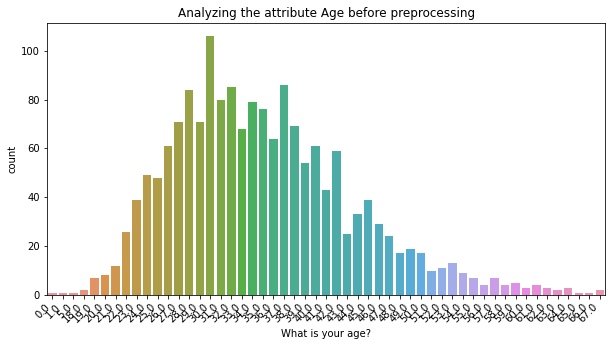

In [8]:
# Plot a histogram for the values of ages before preprocessing
plt.rcParams["figure.figsize"] = (10, 5)
age = sns.countplot(data=df, x='What is your age?')
age.set_title('Analyzing the attribute Age before preprocessing')
age.set_xticklabels(age.get_xticklabels(), rotation=40, ha="right")
plt.xticks(rotation=45)
plt.show()

In [9]:
# Get the unique values of ages
df['What is your age?'].unique()

array([27., 31., 36., 22., 52., 30., 38., 35., 40., 23., 34., 28., 53.,
       21., 18., 37., 25., 33., 66., 32., 46., 29., 39., 42., 43., 47.,
       64., 45., 54., 61., 26., 44., 50., 24., 57., 48., 41., 20., 49.,
       62., 51., 60., 58., 59., 67., 56., 55., nan, 19., 65.,  0., 63.,
        5.,  1.])

As we can analyze from the graph and unique values, there exist nan . Values below 18 and above 80 make very little sense, so we'll replace the corresponding values with the median of the age column.

In [10]:
'''# How many dubious values of ages of each type do we have?
print("Responses with ages less than 18:")
print(df[df['What is your age?'] < 18].What is your age?)
print("\nResponses with ages more than 80:")
print(df[df['What is your age?'] > 80].What is your age?)
print("\nNull responses:", df['What is your age?'].isnull().sum())'''

'# How many dubious values of ages of each type do we have?\nprint("Responses with ages less than 18:")\nprint(df[df[\'What is your age?\'] < 18].What is your age?)\nprint("\nResponses with ages more than 80:")\nprint(df[df[\'What is your age?\'] > 80].What is your age?)\nprint("\nNull responses:", df[\'What is your age?\'].isnull().sum())'

In [11]:
# Replace values of ages less than 18 and more than 80 with the median

# Calculate previous median
median_without_dubious = df.loc[ (df['What is your age?'] > 18) | (df['What is your age?'] < 80), 'What is your age?'].median()

# Replace dubious values with median
df.loc[ (df['What is your age?'] < 18) | (df['What is your age?'] > 80), 'What is your age?'] = median_without_dubious

# Describe the attribute to analyze min and max
df['What is your age?'].describe()

count    1703.000000
mean       35.016442
std         8.494055
min        18.000000
25%        29.000000
50%        34.000000
75%        40.000000
max        67.000000
Name: What is your age?, dtype: float64

The minimum and maximum ages are 18 and 71 with the mean at around 35. We seemed to have completed cleaning up Age.

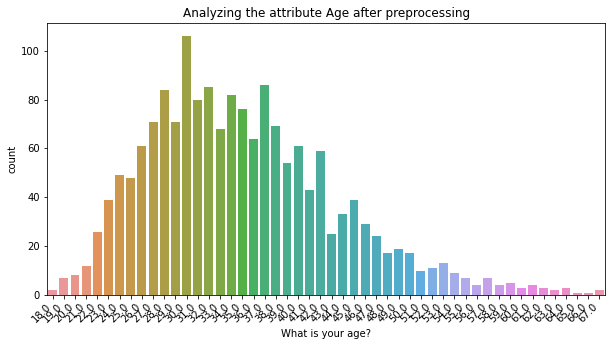

In [12]:
# Plot a histogram for the values of ages after preprocessing
plt.rcParams["figure.figsize"] = (10, 5)
age = sns.countplot(data=df, x='What is your age?')
age.set_title('Analyzing the attribute Age after preprocessing')
age.set_xticklabels(age.get_xticklabels(), rotation=40, ha="right")
plt.xticks(rotation=45)
plt.show()

**Analysis**

The graph for the continuous Age attribute is a **positively skewed histogram**. Many people fall into the age 30 and 33 bins.

In [13]:
# Get the unique values of ages
print("Unique values:\n", df['What is your age?'].unique())

Unique values:
 [27. 31. 36. 22. 52. 30. 38. 35. 40. 23. 34. 28. 53. 21. 18. 37. 25. 33.
 66. 32. 46. 29. 39. 42. 43. 47. 64. 45. 54. 61. 26. 44. 50. 24. 57. 48.
 41. 20. 49. 62. 51. 60. 58. 59. 67. 56. 55. nan 19. 65. 63.]


In [34]:
df['What is your age?'].isna().sum()

2

##Filling the rows of age attribute which is empyty by its median

In [35]:
median = np.median(df['What is your age?'][df['What is your age?'].isna()==False])
df['What is your age?'].fillna(median,inplace=True)

### 3. Dealing with the `Gender` attribute

In [14]:
# Are there any null values?
df['What is your gender?'].isnull().sum()

23

We observe that there are 23 null values

In [15]:
# What are the unique values in the Gender column?
df['What is your gender?'].unique()

array(['Female', 'male', 'Male', 'female', 'F', 'M', 'Man', nan, 'f',
       'Genderfluid', 'Nonbinary', 'Female ', 'cis-male', 'Mail', 'Woman',
       'male/androgynous ', 'cis hetero male', 'm', 'femalw', 'femail',
       'Male (cis)', 'uhhhhhhhhh fem genderqueer?',
       "male (hey this is the tech industry you're talking about)",
       'female (cis)', 'God King of the Valajar', 'Cis male', 'man',
       'My sex is female.', 'Cis-male', 'Male ', 'Non-binary',
       'Male, cis', 'cis male ', 'Agender/genderfluid', 'Male-ish',
       'woman', 'sometimes', 'female (cisgender)', 'Female (cis) ',
       'Woman-identified', 'Contextual', 'Non binary',
       'Genderqueer demigirl', 'Genderqueer/non-binary', 'cis-Female',
       'cis female', 'nonbinary', 'F, cisgender', 'Female-ish', '\\-',
       'trans woman', 'Transfeminine', 'None', 'Cis Male', 'dude',
       'Ostensibly Male', 'Agender', 'male, born with xy chromosoms',
       'Malel', 'MALE', 'I identify as female', '*shrug emoji

In the survey, this question was open-ended, and so the responses are strings that we need to classify into bins. We do so with three bins:
- Male
- Female
- Other

`rr` and `43` certainly do not belong here. We remove the records with those attribute values.

In [16]:
# Remove the records with those attribute values
df = df[~df['What is your gender?'].isin(['rr', '43'])]

In [17]:
# Replace the strings with the values of bins we require
# Group all related strings into bins

# Group into Male bin


# Group into Female bin
df["What is your gender?"] = df["What is your gender?"].str.lower()
df['What is your gender?'].replace(['f','female ', 'femalw', 'femail', 'female (cis)', 'female (cis) ','cis female ',
                            'my sex is female.', 'female (cisgender)', 'woman-identified', 'cis-female', 
                            'cis female', 'f, cisgender', 'female-ish', 'trans woman', 'i identify as female',
                            '*shrug emoji* (f)', 'cis woman', 'cisgendered woman', 'trans female', 'woman',
                            'cisgender female','female, she/her','female-identified','femmina','femile'], 'female', inplace=True)

# Group into Other bin
df["What is your gender?"].replace(['m', 'man', 'cis-male', 'mail', 'male/androgynous ','cis hetero male', 
                            'male (cis)','male (hey this is the tech industry you\'re talking about)',
                            'god king of the valajar', 'cis male', 'male ', 'male, cis', 'cis male ',
                            'male-ish','dude','ostensibly male','male, born with xy chromosoms','malel', 
                            'trans man','cisgender male', 'swm',"let's keep it simple and say 'male'",'identify as male','masculino','mostly male','cishet male','i have a penis','masculine'], "male", inplace=True)

df["What is your gender?"].replace(['gender non-binary/other','nonbinary','non-binary','non binary','uhhhhhhhhh fem genderqueer?',
                            'agender/genderfluid','sometimes','contextual','genderqueer demigirl','genderqueer/non-binary',
                            '\\-','transfeminine','agender','male (or female, or both)','female/gender non-binary.', 
                            'genderqueer','demiguy','she/her/they/them','other','nonbinary/femme','genderfluid', 'none',
                           'transgender', 'nb', 'gender non-conforming woman','trans non-binary/genderfluid','questioning','i am a wookie','non-binary and gender fluid','rr','43','agender trans woman'], 
                           "other", inplace=True)

df['What is your gender?'].describe()

count     1680
unique       5
top       male
freq      1120
Name: What is your gender?, dtype: object

In [18]:
df['What is your gender?'].fillna(value="male", inplace=True)

We will fill all Nan with male since majority of people who filled the questionnaire are male

In [19]:
# Viewing the counts of each type
df['What is your gender?'].value_counts()

male                                   1143
female                                  510
other                                    48
let's keep it simple and say "male"       1
make                                      1
Name: What is your gender?, dtype: int64

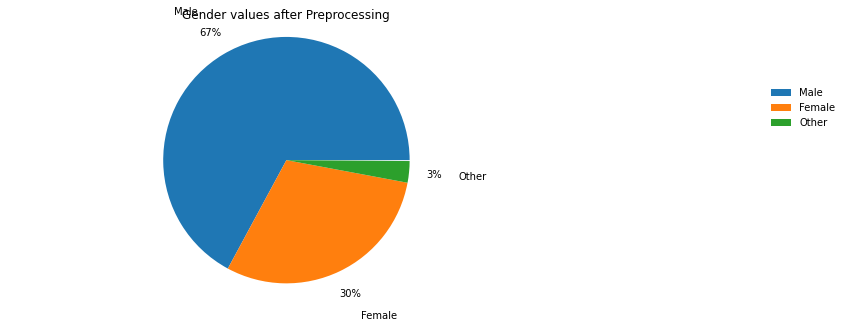

In [20]:
# Visualizing the proportion of genders
fig, ax = plt.subplots()
labels = ['Male', 
         'Female',
         'Other']
male_perc = (df['What is your gender?'] == 'male').sum() / df['What is your gender?'].count()
female_perc = (df['What is your gender?'] == 'female').sum() / df['What is your gender?'].count()
other_perc = (df['What is your gender?'] == 'other').sum() / df['What is your gender?'].count()

percentages = [male_perc, female_perc, other_perc]

ax.pie(percentages, labels=labels,  
       autopct='%1.0f%%', 
       shadow=False, startangle=0,   
       pctdistance=1.2,labeldistance=1.4)
ax.axis('equal')
ax.set_title("Gender values after Preprocessing")
ax.legend(frameon=False, bbox_to_anchor=(1.5,0.8))

As the plot suggests, male responders far outnumber the female and other responders. This is a point to keep in mind as we work on our models in the future.

### 4. Dealing with the `comments` attribute

Viewing comments after droping rows with missing values

In [21]:
for count, i in enumerate(df['comments'].dropna()):
    if count < 30:
        print(i[:80])

Spoke about my anxiety they were very supportive, they spoke about their depress
the coworker was comprehensive, empathetic and understanding, a discussion about
The conversation went well, he too suffers mental illness... however, I was just
Direct Manager and HR know because of medication. No real reactions, Coworkers t
I'm in mental heatlh so I talk about it often., They talked about as caregivers 
Awareness, changed work schedules and expectations
I've talked about my depression with coworkers in the past. They were good liste
One of my coworkers took a month off due to burn out and we talked about it afte
Don’t know 
ok, OK, ok, ok, ok
I needed to discuss accommodations due to Autism and ADHD.  The conversation was
Several times I've seen people with depression or other mental problems be fired
Are you OK?
Yeup, What's up, guys?
I think that the opportunity to have mental health sick leave should be just as 
"I suffer from extreme anxiety and ADD, and take medication for both. Som

##5 .Dealing with `race attribute`

In [37]:
# cleaning race column


# cleaning up racial responses
hispanics = ["Hispanic","Hispanic or Latino","Latina","Latino","Latinx","mexican american "]
no_answer = ["Did not answer","I prefer not to answer",
             "I am of the race of Adam, the first human."]
mixed = ["Mixed","More than one of the above","Hispanic, White","Mestizo"]
jewish = ["Jewish","Ashkenazi"]
caucasian = ["Caucasian","White","European American",
             "My race is white, but my ethnicity is Latin American"]
caribbean = ["Caribbean","Indo-Caribbean","West Indian"]
asian = ["Asian","South Asian"]
aa = ["Afrcian American","Black or African American"]

race_list = [hispanics,no_answer,mixed,jewish,caucasian,caribbean,asian,aa]

for race in race_list:
    for num,info in enumerate(race):
        if num > 0:
            df["What is your race?"][df["What is your race?"]==info] = race[0]
df['What is your race?'].isna().sum()

    

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



653

In [40]:
print(df['What is your race?'].value_counts())
df['What is your race?'].fillna(value="Caucasian", inplace=True)

Caucasian                           1576
Asian                                 44
Mixed                                 36
Did not answer                        30
Afrcian American                      16
Hispanic                               1
American Indian or Alaska Native       1
White Hispanic                         1
Name: What is your race?, dtype: int64


##Dealing with missing values of rating column

In [41]:
median = np.median(df['Overall, how well do you think the tech industry supports employees with mental health issues?'][df['Overall, how well do you think the tech industry supports employees with mental health issues?'].isna()==False])
df['Overall, how well do you think the tech industry supports employees with mental health issues?'].fillna(median,inplace=True)

##Dealing with employee column

In [43]:
print(df['How many employees does your company or organization have?'].value_counts())
df['How many employees does your company or organization have?'].isna().sum()

More than 1000    446
100-500           388
26-100            271
6-25              199
500-1000          126
1-5                33
Name: How many employees does your company or organization have?, dtype: int64


242

In [52]:
df['How many employees does your company or organization have?'].fillna(0,inplace=True)

We replace all the nan values by 0

In [50]:
df.drop(columns=['comments'], inplace = True)

About 70% of the `comments` column is empty hence we drop the comments section too

In [51]:
df.columns

Index(['Unnamed: 0', 'Timestamp', 'Unnamed: 0.1', 'Are you self-employed?',
       'How many employees does your company or organization have?',
       'Is your employer primarily a tech company/organization?',
       'Is your primary role within your company related to tech/IT?',
       'Does your employer provide mental health benefits as part of healthcare coverage?',
       'Do you know the options for mental health care available under your employer-provided health coverage?',
       'Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?',
       'Does your employer offer resources to learn more about mental health disorders and options for seeking help?',
       'Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?',
       'If a mental health issue prompted you to request a medical leave from work, how easy or 

##Dealing with missing values

In [53]:
df.isnull().sum()

Unnamed: 0                                                       0
Timestamp                                                        0
Unnamed: 0.1                                                     0
Are you self-employed?                                           0
How many employees does your company or organization have?       0
                                                              ... 
What country do you work in?                                     2
What US state or territory do you work in?                     617
What disorder(s) have you been diagnosed with?                1705
If possibly, what disorder(s) do you believe you have?        1363
If so, what disorder(s) were you diagnosed with?              1013
Length: 72, dtype: int64

Viewing the number the null values in each of the column matrix attribute

In [54]:
df.shape

(1705, 72)

We observe that a lot of columns  have null values and we  drop columns with over 50% NaN values

In [55]:
delete_list = df.isna().sum()[df.isna().sum() > 587]
for num in range(len(delete_list)):
    df.drop(columns = delete_list.index[num],inplace=True)

We observe that about 17 columns had more than 50% null values hence they were dropped

In [56]:
df.shape

(1705, 56)